## 安裝 plotly

In [1]:
! pip install plotly

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Scatter Plot

In [1]:
import plotly.offline as pyo
import plotly.graph_objs as go
import numpy as np
pyo.init_notebook_mode(connected=True)

In [2]:
np.random.seed(42)
np.random.randint(1,42,6)

array([39, 29, 15,  8, 21, 39])

In [3]:
np.random.seed(42)
random_x = np.random.randint(1,101,100)
random_y = np.random.randint(1,101,100)

In [4]:
data = [
    go.Scatter(
        x = random_x,
        y = random_y,
        mode = 'markers',
    )
]


In [6]:
pyo.iplot(data, filename='scatter1.html')

In [7]:
layout = go.Layout(
    title = 'Random Data Scatterplot',
    xaxis = dict(title = 'Some random x-values'),
    yaxis = dict(title = 'Some random y-values'),
    hovermode ='closest' 
)


In [8]:
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig, filename='scatter2.html')

In [9]:
data = [
    go.Scatter(
        x = random_x,
        y = random_y,
        mode = 'markers',
        marker = dict(      
            size = 12,
            color = 'rgb(51,204,153)',
            symbol = 'pentagon',
            line = dict(
            width = 2,
            )
        )
    )
]


In [10]:
?pyo.plot
?pyo.iplot

In [11]:
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig, filename='scatter3.html')

## Line Plot

In [12]:
import pandas as pd
df = pd.DataFrame(np.random.randn(100,4),columns='A B C D'.split())

In [13]:
data = []
for col in df.columns:
    data.append({'x':df.index, 'y':df[col], 'name':col})

In [15]:
pyo.iplot(data)

In [16]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/ctbc/master/data/nst-est2017-alldata.csv')

In [17]:
df2 = df[df['DIVISION']=='1']
df2.set_index('NAME', inplace=True)
df2 = df2[[col for col in df2.columns if col.startswith('POP')]]
df2.head()

,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017
NAME,,,,,,,,
Connecticut,3580171.0,3591927.0,3597705.0,3602470.0,3600188.0,3593862.0,3587685.0,3588184.0
Maine,1327568.0,1327968.0,1328101.0,1327975.0,1328903.0,1327787.0,1330232.0,1335907.0
Massachusetts,6564943.0,6612178.0,6659627.0,6711138.0,6757925.0,6794002.0,6823721.0,6859819.0
New Hampshire,1316700.0,1318345.0,1320923.0,1322622.0,1328684.0,1330134.0,1335015.0,1342795.0
Rhode Island,1053169.0,1052154.0,1052761.0,1052784.0,1054782.0,1055916.0,1057566.0,1059639.0


In [18]:
traces=[
    go.Scatter(
        x = df2.columns,
        y = df2.loc[name],
        mode = 'markers+lines',
        name = name
) for name in df2.index]


In [19]:
pyo.iplot(traces)

In [20]:
layout = go.Layout(
    title = 'Population Estimates of the Six New England States'
)

fig = go.Figure(data=traces,layout=layout)
pyo.iplot(fig, filename='line3.html')


## Area Chart

In [21]:
month  = [1,2,3,4,5]
taipei = [92.5,132.6,168.8,159.1,218.7]
tainan = [21.2, 30.6, 37.3, 84.6, 184.3]


In [22]:
trace1 = go.Scatter(
    x=month,
    y=taipei,
    fill='tozeroy'
)

trace2 = go.Scatter(
    x=month,
    y=tainan,
    fill='tozeroy'
)


In [23]:
data = [trace1, trace2]

In [24]:
pyo.iplot(data)

In [25]:
total = []
for i,j in zip(taipei, tainan):
    total.append(i+j)

In [26]:
total

[113.7, 163.2, 206.10000000000002, 243.7, 403.0]

In [27]:
trace1 = go.Scatter(
    x=month,
    y=taipei,
    fill='tozeroy'
)

trace2 = go.Scatter(
    x=month,
    y=total,
    fill='tonexty'
)


In [28]:
data = [trace1, trace2]

In [29]:
pyo.iplot(data)

## Bar Chart

In [30]:
traindata = pandas.read_csv('data/train.csv')

In [31]:
stat = traindata.groupby('YrSold')['Id'].count()

Populating the interactive namespace from numpy and matplotlib


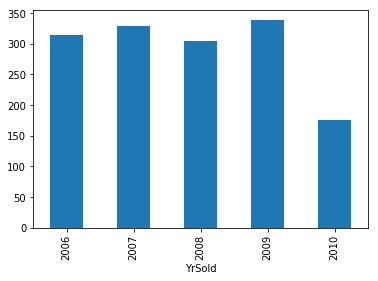

In [32]:
%pylab inline
stat.plot(kind='bar')

Populating the interactive namespace from numpy and matplotlib


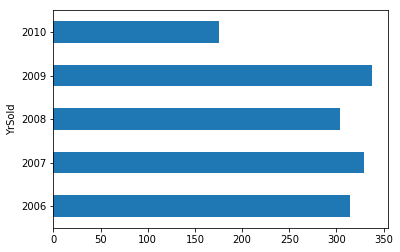

In [33]:
%pylab inline
stat.plot(kind='barh')

In [34]:
data = [go.Bar(
    x=stat.index,  
    y=stat
)]


In [35]:
pyo.iplot(data, filename='bar1.html')


In [36]:
stat = traindata.groupby(['HouseStyle','YrSold'])['Id'].count().unstack()

In [37]:
stat

YrSold,2006,2007,2008,2009,2010
HouseStyle,,,,,
1.5Fin,34.0,28.0,37.0,39.0,16.0
1.5Unf,1.0,7.0,3.0,3.0,NaN
1Story,151.0,167.0,146.0,167.0,95.0
2.5Fin,2.0,1.0,3.0,2.0,NaN
2.5Unf,2.0,4.0,3.0,2.0,NaN
2Story,101.0,99.0,92.0,102.0,51.0
SFoyer,8.0,9.0,5.0,9.0,6.0
SLvl,15.0,14.0,15.0,14.0,7.0


In [38]:
trace1 = go.Bar(
    x=stat.index,  
    y=stat[2006],
    name = '2006',
    marker=dict(color='#FFD700')
)

trace2 = go.Bar(
    x=stat.index,  
    y=stat[2007],
    name = '2007',
    marker=dict(color='#9EA0A1')
)


In [39]:
data = [trace1, trace2]

fig = go.Figure(data=data)
pyo.iplot(fig, filename='bar2.html')


In [40]:
data = [go.Bar(
    x=stat.index,  
    y=stat[col],
    name = str(col)
) for col in stat.columns]

In [41]:
fig = go.Figure(data=data)
pyo.iplot(fig, filename='bar2.html')

## Adobe Color Wheel
- https://color.adobe.com/zh/explore/?filter=most-popular&time=month
- https://www.rgbtohex.net/

In [42]:
?go.Bar

In [43]:
year   = [1,2,3,4]
grades = [80,82,84,88]
trace1 = go.Bar(
    x=year,  
    y=grades,
    name = 'grades'
)
data = [trace1]
pyo.iplot(data)

In [45]:
import plotly.offline as pyo
import plotly.graph_objs as go
import numpy as np
pyo.init_notebook_mode(connected=True)

In [46]:
import pandas
traindata = pandas.read_csv('data/train.csv')

In [47]:
#traindata['SalePrice']

In [48]:
data = [
    go.Histogram(x = traindata['SalePrice'])
]

In [49]:
pyo.plot(data)

'file:///Users/davidchiu/course/ctbc/temp-plot.html'

In [51]:
data = [
    go.Histogram(
        x = traindata['SalePrice'],
        xbins=dict(start=100000,end=200000,size=10000),
    )
]
pyo.plot(data)



'file:///Users/davidchiu/course/ctbc/temp-plot.html'

In [55]:
#traindata['HouseStyle'] == '1Story'

In [61]:
data = [
    go.Histogram(
        x = traindata.loc[traindata['HouseStyle'] == '1Story','SalePrice'],
        opacity=0.75,
        name = '1Story'
    ),
    go.Histogram(
        x = traindata.loc[traindata['HouseStyle'] == '2Story','SalePrice'],
        opacity=0.75,
        name = '2Story'
    )
]

In [62]:
pyo.plot(data)

'file:///Users/davidchiu/course/ctbc/temp-plot.html'

In [63]:
layout = go.Layout(
    barmode='overlay',
    title="Price comparison by HouseStyle"
)


In [64]:
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename='basic_histogram2.html')


'file:///Users/davidchiu/course/ctbc/basic_histogram2.html'

In [66]:
import plotly.figure_factory as ff

x = np.random.randn(1000)
hist_data    = [x]
group_labels = ['distplot']

fig = ff.create_distplot(hist_data, group_labels)
pyo.plot(fig, filename='basic_distplot.html')


'file:///Users/davidchiu/course/ctbc/basic_distplot.html'

In [68]:
x1 = np.random.randn(200)-2
x2 = np.random.randn(200)
x3 = np.random.randn(200)+2
x4 = np.random.randn(200)+4

hist_data = [x1,x2,x3,x4]
group_labels = ['Group1','Group2','Group3','Group4']

fig = ff.create_distplot(hist_data, group_labels)
pyo.plot(fig, filename='multiset_distplot.html')


'file:///Users/davidchiu/course/ctbc/multiset_distplot.html'

In [70]:
snodgrass = [.209,.205,.196,.210,.202,.207,.224,.223,.220,.201]
twain = [.225,.262,.217,.240,.230,.229,.235,.217]

hist_data = [snodgrass,twain]
group_labels = ['Snodgrass','Twain']

fig = ff.create_distplot(hist_data, group_labels, bin_size=[.005,.005])
pyo.plot(fig, filename='SnodgrassTwainDistplot.html')


'file:///Users/davidchiu/course/ctbc/SnodgrassTwainDistplot.html'

## Pie Chart

In [74]:
stat = traindata.groupby('HouseStyle')['Id'].count()

In [76]:
data = [
    go.Pie(
        labels = stat.index,
        values = stat
    )
    
]
pyo.plot(data)

'file:///Users/davidchiu/course/ctbc/temp-plot.html'

In [77]:
data = [
    go.Pie(
        labels = stat.index,
        values = stat,
        hole = 0.4
    )
    
]
pyo.plot(data)

'file:///Users/davidchiu/course/ctbc/temp-plot.html'

In [79]:
y = [1,14,14,15,16,18,18,19,19,20,20,23,24,26,27,27,28,29,33,54]

data = [
    go.Box(
        y=y,
        boxpoints='all',
        jitter=0.3,     
        pointpos=-1.8   
    )
]
pyo.plot(data, filename='box1.html')


'file:///Users/davidchiu/course/ctbc/box1.html'

In [81]:
y = [1,14,14,15,16,18,18,19,19,20,20,23,24,26,27,27,28,29,33,54]

data = [
    go.Box(
        y=y,
        boxpoints='outliers' 
    )
]
pyo.plot(data, filename='box2.html')


'file:///Users/davidchiu/course/ctbc/box2.html'

In [82]:
snodgrass = [.209,.205,.196,.210,.202,.207,.224,.223,.220,.201]
twain = [.225,.262,.217,.240,.230,.229,.235,.217]

data = [
    go.Box(
        y=snodgrass,
        name='QCS'
    ),
    go.Box(
        y=twain,
        name='MT'
    )
]
layout = go.Layout(
    title = 'Comparison of three-letter-word frequencies<br>\
    between Quintus Curtius Snodgrass and Mark Twain'
)
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename='box3.html')


'file:///Users/davidchiu/course/ctbc/box3.html'

In [ ]:
data = [
    go.Box(
        y=traindata.iloc[traindata[HouseStyle== '1Story', 'SalePrice'],
        name='QCS'
    ),
    go.Box(
        y=twain,
        name='MT'
    )
]

fig = go.Figure(data=data)
pyo.plot(fig, filename='box3.html')
